In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
%matplotlib inline

In [4]:
milk = pd.read_csv('monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)

Данные по ежемесячному уровню производства молока в фунтах на одну корову

In [58]:
milk.head()

,milk
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


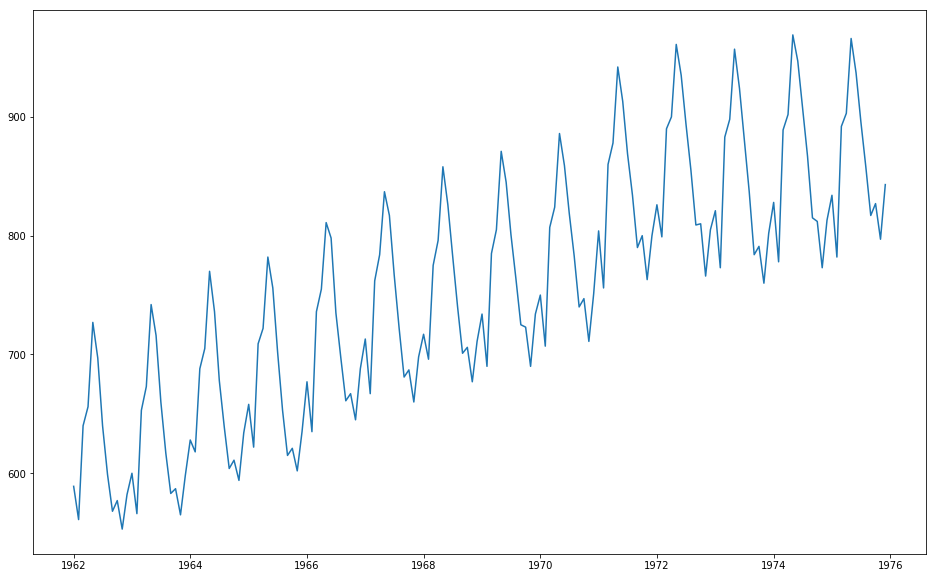

In [10]:
plt.figure(figsize=(16,10))
plt.plot(milk)
plt.show()

Примените к ряду из предыдущего вопроса критерий Дики-Фуллера. Чему равен полученный достигаемый уровень значимости? Округлите до двух знаков после десятичной точки.

In [54]:
from statsmodels.api import tsa

In [55]:
adf, p, usedlag, nobs, crit_values, icbest = tsa.stattools.adfuller(milk.milk)

In [56]:
p

0.6274267086030316

Часто, когда вы имеете дело с величинами, представляющими собой сумму значений показателя за каждый день или за каждый рабочий день, имеет смысл перед началом прогнозирования поделить весь ряд на число дней в периоде. Например, если поделить ряд с объёмом производства молока на одну корову на число дней в месяце, полученная величина будет меняться более плавно, и для неё легче будет построить прогнозирующую модель.

Корректно определить число дней в месяце можно с помощью свойства days_in_month у индекса ряда или функции monthrange из пакета calendar. Используйте число дней в месяце для того, чтобы вычислить новый показатель — среднее дневное число полученного молока на одну корову. Постройте график этого ряда и убедитесь, что он стал более гладким.

В качестве ответа введите сумму значений полученного показателя за весь период; округлите до двух знаков после десятичной точки.

In [59]:
milk['daily'] = milk.milk.values / milk.index.days_in_month

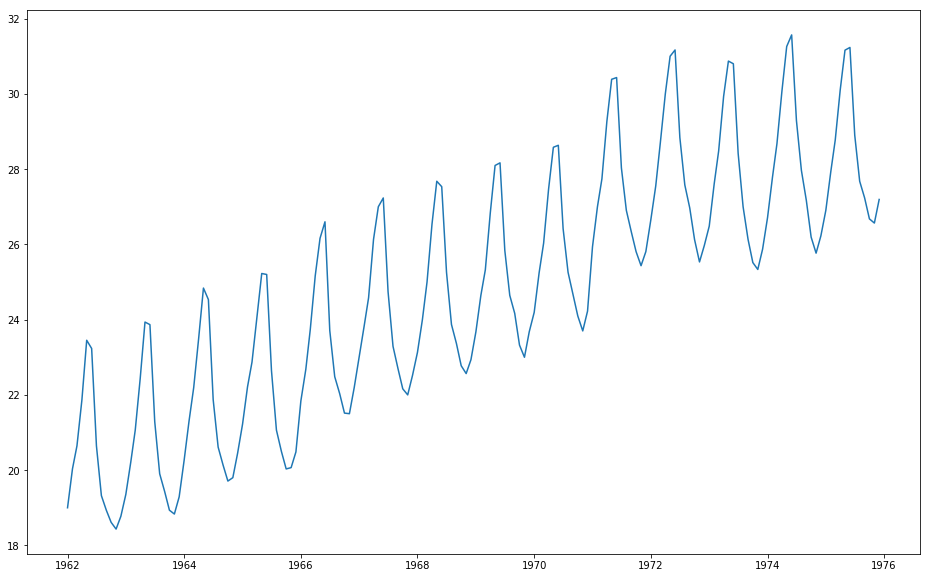

In [61]:
plt.figure(figsize=(16,10))
plt.plot(milk.index, milk.daily)
plt.show()

In [62]:
sum(milk.daily)

4166.326661899464

Для ряда со средним дневным количеством молока на корову из предыдущего вопроса давайте с помощью критерий Дики-Фуллера подберём порядок дифференцирования, при котором ряд становится стационарным.

При дифференцировании длина ряда сокращается, поэтому в части строк в новой колонке значения будут не определены (NaN). Подавая полученные столбцы на вход критерию Дики-Фуллера, отрезайте неопределённые значения, иначе вы получите неопределённый достигаемый уровень значимости.

Итак, какое дифференцирование делает ряд стационарным?

In [65]:
milk['daily_diff1'] = milk.daily - milk.daily.shift(1)

In [68]:
milk['daily_diff12'] = milk.daily - milk.daily.shift(12)

In [84]:
milk['daily_diff_s_1'] = milk.daily_diff12 - milk.daily_diff12.shift(1)

In [77]:
adf, p, usedlag, nobs, crit_values, icbest = tsa.stattools.adfuller(milk[milk.daily_diff1.notnull()].daily_diff1)
p

0.0643005465417478

In [78]:
adf, p, usedlag, nobs, crit_values, icbest = tsa.stattools.adfuller(milk[milk.daily_diff12.notnull()].daily_diff12)
p

0.22127672658830427

In [85]:
adf, p, usedlag, nobs, crit_values, icbest = tsa.stattools.adfuller(milk[milk.daily_diff_s_1.notnull()].daily_diff_s_1)
p

2.280845551803756e-06

Для стационарного ряда из предыдущего вопроса (продифференцированного столько раз, сколько вы посчитали нужным) постройте график автокорреляционной функции.

Исходя из этого графика, какое начальное приближение вы предложили бы для параметра Q в модели SARIMA?

In [89]:
from statsmodels.api import graphics

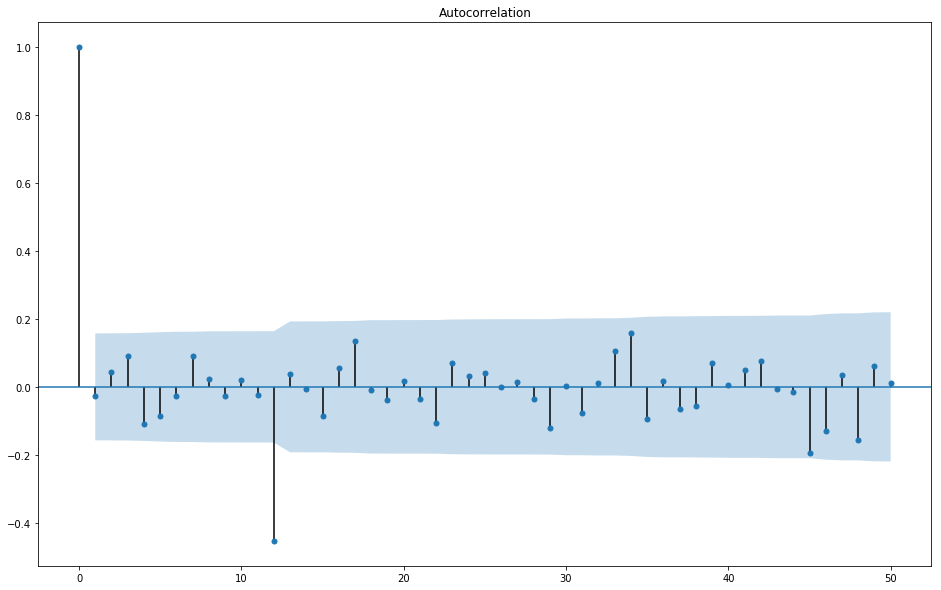

In [107]:
plt.figure(figsize=(16, 10))
ax = plt.subplot(111)
graphics.tsa.plot_acf(milk[milk.daily_diff_s_1.notnull()].daily_diff_s_1.values.squeeze(), lags=50, ax=ax)
plt.show()

Ответ: 1

Для того же ряда, что и в предыдущем вопросе, постройте график частичной автокорреляционной функции.

Исходя из этого графика, какое начальное приближение вы предложили бы для параметра p в модели SARIMA?

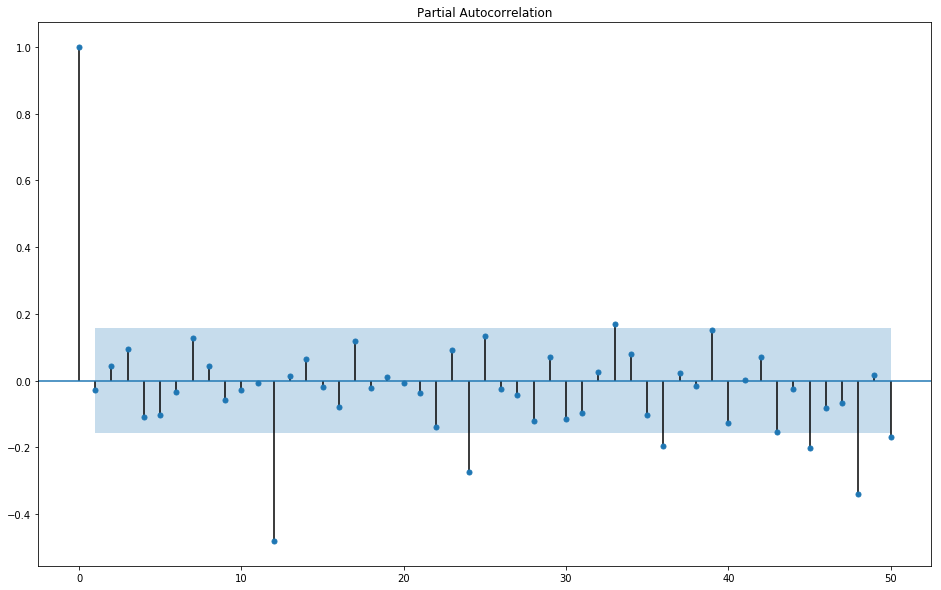

In [108]:
plt.figure(figsize=(16, 10))
ax = plt.subplot(111)
graphics.tsa.plot_pacf(milk[milk.daily_diff_s_1.notnull()].daily_diff_s_1.values.squeeze(), lags=50, ax=ax)
plt.show()

Ответ: 0